In [2]:
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split,cross_val_score # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric
from sklearn.feature_selection import RFECV # for Recursive Feature Elimination with Cross Validation


In [3]:
data = pd.read_csv('nyc-rolling-sales.csv', index_col=0)

In [4]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [6]:
#do a data assessment of the data
#! is for shell ???
!pip install pandas_profiling

In [7]:
import pandas_profiling as pp

In [8]:
report = pp.ProfileReport(data, title='Housing Data Assessment')

In [9]:
report.to_file('data_assessment.html')

In [385]:
report

In [10]:
data['SALE PRICE'].head()

# but it's wrong because data type is object, it should be float

4    6625000
5        -  
6        -  
7    3936272
8    8000000
Name: SALE PRICE, dtype: object

In [11]:
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')

#it will coerce/ force the sales to turn 0 into NaN

In [12]:
data['SALE PRICE'].head()

# if you put this into excel, the NaN becomes blank

4    6625000.0
5          NaN
6          NaN
7    3936272.0
8    8000000.0
Name: SALE PRICE, dtype: float64

In [13]:
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data['TOTAL UNITS'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')

In [14]:
data[['GROSS SQUARE FEET', 'LAND SQUARE FEET', 'TOTAL UNITS']].dtypes

# 1 square bracket for single variable
# 2 for multiple variables

GROSS SQUARE FEET    float64
LAND SQUARE FEET     float64
TOTAL UNITS          float64
dtype: object

In [15]:
data['SALE PRICE'].isna()
# it's just a preview

4       False
5        True
6        True
7       False
8       False
        ...  
8409    False
8410    False
8411    False
8412    False
8413    False
Name: SALE PRICE, Length: 84548, dtype: bool

In [16]:
data['SALE PRICE'].isna().sum()
data['TOTAL UNITS'].isna().sum()
# there's a function later called fillna() to fill all the null cells

26252

In [17]:
#make blank cells turn into 0

data['SALE PRICE'] = data['SALE PRICE'].fillna(0)
data['TOTAL UNITS'] = data['TOTAL UNITS'].fillna(0)

In [18]:
data['SALE PRICE'].isna().sum()
data['TOTAL UNITS'].isna().sum()
#now we have a target variable  with all cells filled

0

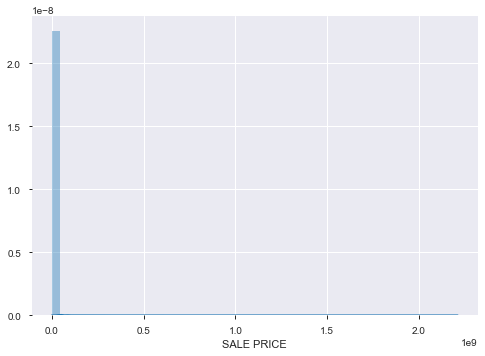

In [396]:
## How to clean
# 1. describe data set
# 2. if the varibale has 0, make the variable > 0, and adjust
# 3. describe data set again and check for minimum
# 4. do it for other variables


sns.distplot(data['SALE PRICE']) 
#check how many 0

In [19]:
#remove rows in data where Sale Price is 0
#this will retain all data such that data is > 0 or in the next case 10000

# marj range = 100k to 550k
new_data = data[data['SALE PRICE'] > 20000]

In [20]:
new_data['SALE PRICE'].describe()

#notice that there's a 1 dollar house which doesn't make sense so try to remove 1 dollar

count    5.824200e+04
mean     1.533795e+06
std      1.248669e+07
min      2.004000e+04
25%      3.900000e+05
50%      6.400000e+05
75%      1.100000e+06
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [21]:
##now do it for the other variables like Gross Square Feet

new_data = new_data[new_data['GROSS SQUARE FEET'] > 0]

#actually it's useless because the minimum gross square feet is 120

In [22]:
new_data['GROSS SQUARE FEET'].describe()

count    2.833500e+04
mean     4.555108e+03
std      3.403867e+04
min      1.200000e+02
25%      1.360000e+03
50%      1.872000e+03
75%      2.665500e+03
max      3.750565e+06
Name: GROSS SQUARE FEET, dtype: float64

In [23]:
new_data = new_data[new_data['LAND SQUARE FEET'] > 0]

In [24]:
new_data['LAND SQUARE FEET'].describe()

count    2.833100e+04
mean     4.267038e+03
std      3.822319e+04
min      2.000000e+02
25%      2.000000e+03
50%      2.500000e+03
75%      4.000000e+03
max      4.228300e+06
Name: LAND SQUARE FEET, dtype: float64

In [25]:
new_data['TOTAL UNITS'].describe()

count    2.833100e+04
mean     4.267038e+03
std      3.822319e+04
min      2.000000e+02
25%      2.000000e+03
50%      2.500000e+03
75%      4.000000e+03
max      4.228300e+06
Name: TOTAL UNITS, dtype: float64

In [26]:
new_data = new_data[new_data['TOTAL UNITS'] > 0]

In [27]:
new_data['TOTAL UNITS'].describe()

count    2.833100e+04
mean     4.267038e+03
std      3.822319e+04
min      2.000000e+02
25%      2.000000e+03
50%      2.500000e+03
75%      4.000000e+03
max      4.228300e+06
Name: TOTAL UNITS, dtype: float64

In [28]:
pd.get_dummies(new_data['BOROUGH'])

,1,2,3,4,5
4,1,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
10,1,0,0,0,0
13,1,0,0,0,0
...,...,...,...,...,...
8409,0,0,0,0,1
8410,0,0,0,0,1
8411,0,0,0,0,1
8412,0,0,0,0,1


In [29]:
new_borough = pd.get_dummies(new_data['BOROUGH'])

In [30]:
new_data = pd.concat([new_data,new_borough],axis=1,sort=False)

In [31]:
new_borough.shape

(28331, 5)

In [32]:
new_data.columns

Index([                       'BOROUGH',                   'NEIGHBORHOOD',
              'BUILDING CLASS CATEGORY',           'TAX CLASS AT PRESENT',
                                'BLOCK',                            'LOT',
                            'EASE-MENT',      'BUILDING CLASS AT PRESENT',
                              'ADDRESS',               'APARTMENT NUMBER',
                             'ZIP CODE',              'RESIDENTIAL UNITS',
                     'COMMERCIAL UNITS',                    'TOTAL UNITS',
                     'LAND SQUARE FEET',              'GROSS SQUARE FEET',
                           'YEAR BUILT',      'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE',                     'SALE PRICE',
                            'SALE DATE',                                1,
                                      2,                                3,
                                      4,                                5],
      dtype='object')

In [33]:
# Define features
features=['GROSS SQUARE FEET','LAND SQUARE FEET',1, 2, 3, 4, 5]

#just to try Ridge regression, I removed 1, 2, 3, 4, 5

# Set X
X = new_data[features]

In [34]:
y= new_data['SALE PRICE']

In [35]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [36]:
# Initialize model 
model = LinearRegression()

In [37]:
# Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# get coefficients
coefficient= model.coef_

# get intercept
intercept = model.intercept_

In [40]:
# print coefficient
coefficient

array([ 6.27134266e+02, -2.65554082e+02, -6.48643021e+05, -9.40708615e+05,
        3.77051623e+05,  4.19867418e+05,  7.92432594e+05])

In [41]:
# print intercept
intercept

-210616.86622382211

In [42]:
# calculate the R-squared
model.score(X_test, y_test)

-2.5920822552695415

In [43]:
y_predicted = model.predict(X_test)

In [44]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_))), columns = ['Features', 'Coefficients'])
coefficients_pd

,Features,Coefficients
0,GROSS SQUARE FEET,627.134266
1,LAND SQUARE FEET,-265.554082
2,1,-648643.020626
3,2,-940708.614564
4,3,377051.622780
5,4,419867.418265
6,5,792432.594146


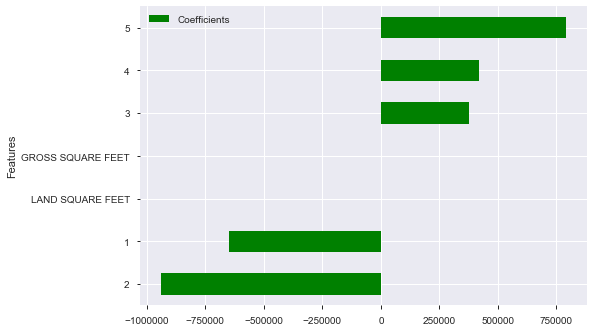

In [45]:
# Plot Contribution chart
coefficients_pd.sort_values('Coefficients').set_index('Features').plot(kind = 'barh', color = 'g')

In [46]:
np.sqrt(mse(y_predicted, y_test)) # Root mean squared error

15164321.437386505

In [47]:
# standardizing - makes 0 and standard deviation in the pairplot

from sklearn.preprocessing import StandardScaler

#instantiate standard scaler
scaler = StandardScaler()
scaler.fit(X)

#transform original data to zero mean and unit variance
transformed_data = scaler.transform(X)

#convert to original dataframe schema
transformed_data_df = pd.DataFrame(transformed_data, columns = X.columns)

In [48]:
# sns.pairplot(X)

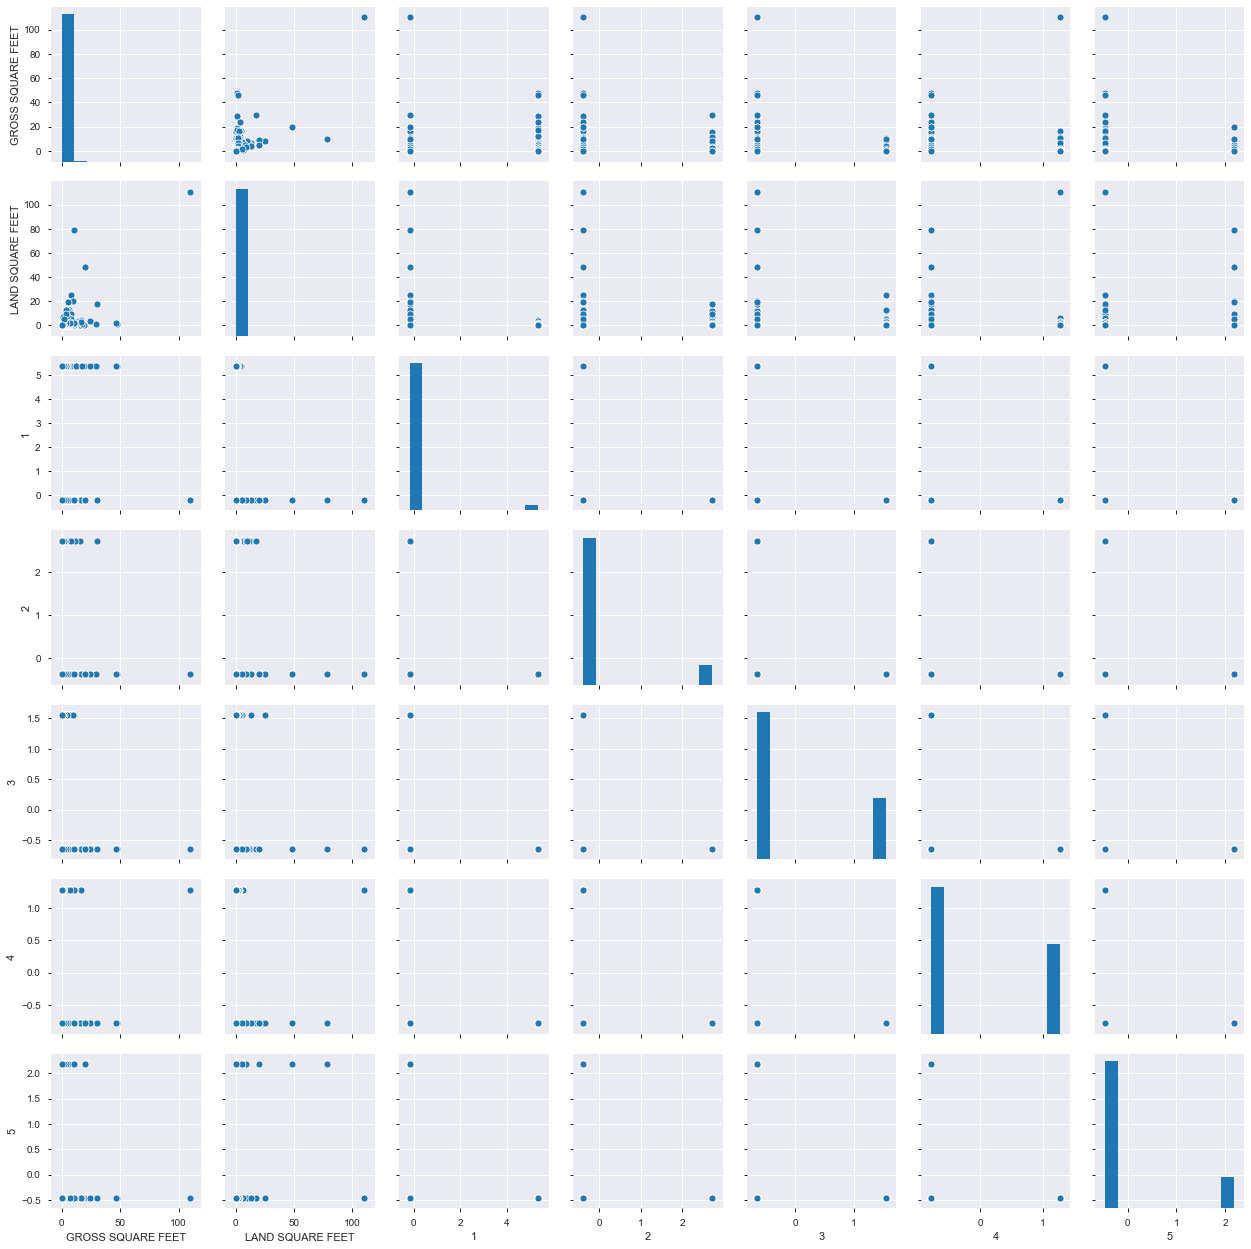

In [49]:
sns.pairplot(transformed_data_df)

In [ ]:
# # set bins
# bins = [-0.01, 1, 2, 3, 4, 5, 6] #we start with a negative bin to include zeroes

# # Create Group Names
# group_names = ['0-0.99', '1-1.99', '2-2.99','3-3.99','4-4.99', '5-5.99']

# from sklearn.impute import SimpleImputer

# #Mean imputation (can be imputed by 'mean','median', 'most_frequent','constant')
# imp = SimpleImputer(missing_values = np.nan, strategy='mean')

# #fit the imputer on the data needed to impute
# imp.fit(X.values)

# #convert imputed data to original data schema
# X = pd.DataFrame(imputed_data, columns=X.columns)



In [461]:
# #trying out decision tree

##TRIAL 1

# from sklearn import tree
# A = [[0,0], [1,1]]
# B = [0,1]
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(A, B)

##TRIAL 2
#trying out another decision tree

# from sklearn import tree
# A = [[0,0], [2,2]]
# B = [0.5,2.5]
# clf = tree.DecisionTreeRegressor()
# clf = clf.fit(A, B)
# clf.predict([[1,1]])



In [50]:
np.sqrt(mse(y_predicted, y_test)) # Root mean squared error

15164321.437386505

In [463]:
#TRIAL 3
#trying out Ridge regression

from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
A= rng.randn(n_samples)
B= rng.randn(n_samples, n_features)
clf=Ridge(alpha=1.0)
clf.fit(A,B)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.